# Introduction to Learning Model Structure



## CSCI E-83
## Stephen Elston


In the previous lesson we explored some approaches to learning model parameters. This discussion assumed that the model structure or skeleton was known. However, there are many cases where this structure may not be known a priori. In this lesson we will focus on algorithms for **learning model structure**. The role of learning in an intelligent agent is illustrated in the figure below.

<img src="img/Learning.JPG" alt="Drawing" style="width:400px; height:200px"/>
<center> **Learning in an intelligent agent** </center>

The goal of probabilistic network structure learning is to determine the independencies in the distribution of the data. The independencies determine the structure of the graph. Typically the goal is to minimize a measure of **divergence** between the distribution of the data and the distribution represented by the graph.  

All methods for learning the structure of probabilistic graphical models are approximate and computationally intensive. At best, the learned structure is an approximation of the  Further, these algorithms require considerably more data than is required for inference. 

Some options for learning model structure include:

- **Eliciting knowledge** from experts on the independencies of the distribution. However, this can be a tedious process for more than fairly simple problems. 
- Estimate the potentials of the graph though parameter estimation or **parameter learning** of the distributions. This approach assumes that we know these distributions. 
- Use learning to the structure of the graph, known as **structure learning**. As you will see, this approach will typically lead to an approximate solution, which may not capture the true independencies. 

Suggested readings for this lesson include the following, along with references contained herein:
- Barber Section 9.5,
- Murphy Section 26.1, 26.2, 26.3, 26.4. 

> **Note 1:** In this lesson we are only concerned with finding the structure of Bayesian networks or DAGS. Finding the structure of undirected Markov networks involves maximum likelihood methods, and can be considerably more difficult. For introductions to this problem see Barber Section 9.6 or Murphy Section 26.7. 

> **Note 2:** In this lesson we will only explore algorithms for finding structure of Bayesian or directed networks with complete data. We will not address the problems of finding the structure of networks with hidden or latent variables. These later problems are considerably harder to deal with and an area of on-going research. **Structural expectation-maximization** or **Structural EM** algorithms are typically used. For an overview of these methods see Murphy Section 26.5 or Barber Section 11.2. 

## Problems of Structure Estimation

Finding graphical model the structure from data is a complex problem. The goal is to find a graph structure which best represents the independencies of the distribution of the data. This is accomplished by searching through possible graph structures. 

Finding graph structure can be used as a data mining method. However, searching for graph structure is not without some serious pitfalls. The result is that any structure determined from a finite quantity of data is approximate at best. Interpretation of any relationships found in resulting graph structures should be done with caution. 

The pitfalls not withstanding, an approximately correct graph can provide useful inferences for many types of complex problems.

### Search and Computational Complexity
Let's explore the computational complexity of finding the structure of a graphical models. Consider the fully connected graph of the variables in the student model illustrated below.   

<img src="img/FullyConneted.JPG" alt="Drawing" style="width:400px; height:250px"/>
<center> Fully connected student graph </center>

There are quite a few possible edges between these variables. Consider the complexity of an algorithm that attempts to search all possible graphs for these variables. The complexity of this type of **exhaustive serach**:

$$C(n) = n^{O(2^{O(n)})}$$

You can see from the above relationship that exhaustive search is computationally infeasible for all but the smallest graph. This fact means that all practical structure finding algorithms are necessarily approximate.  

In practice, structure search is performed using some combination of the following:
1. **Constraints** on the search. A common constraint is on the number of parents of each node. Another common constraint is to assume the graph is a tree.
2. Use of **search heuristics** to reduce the complexity of the search. There are many possibilities, several of which are used in other machine intelligence applications.  



### I-equivalence and Ambiguity in Graph Structure Search

In previous lessons we have seen that the graphs representing an I-map of a distribution are not unique. From another perspective, we can say that it is possible for several DAGs to exhibit Markov equivalence. These facts mean that there is ambiguity in the determination of graph structure from data. It should not come as a surprise that several DASs exhibit nearly the same fit to a set of data.  

A further, and often more significant problem in practice,  is that with limited amounts of data determination of independencies is error prone. In fact, it will often be the case that any pair of variables in a finite size dataset will show some dependencies. 

The above problems can be overcome in an approximate sense in several ways including:
- Using constraints on the graph structure search. 
- Setting thresholds or using significance tests for determining independencies. 

## PC Algorithm

One of the oldest algorithms for finding network structure is the **PC algorithm**. The PC algorithm is a locally greedy search algorithm for determining the structure of Bayesian networks. The PC algorithm is a two step process:

- The skeleton of the graph is determined.
- The direction of the edges is determined.

The PC algorithm uses **constraint satisfaction search** methods. Constraint satisfaction search is a classic artificial intelligence learning method. The constraint satisfaction search problem predates the computer era. Frances Guthrie applied the method to the 4 color map problem in 1852. Constraint satisfaction search methods were applied in artificial intelligence starting in the early 1960s. For readable discussion of the constraint satisfaction search methods in artificial intelligence see Chapter 6 of Russell and Norvig, third edition. 

The determination of the skeleton can be done in a number of ways. One approach is using greedy elimination:

- Start with a fully connected network. 
- Find the a connection with $x \bot y\ |\ \oslash$ using a **mutual information criteria**. That is $x$ and $y$ are independent. A Chi Squared significance test is used to determine set a cut-off for independence.
- Repeat the above step until the algorithm terminates when the number of connections per node is at or below a predetermined threshold. 

With the skeleton determined, the directions of the edges must be determined. For three variables $x$, $y$ and $z$ this can be done using the independencies:

$$x \bot y\ |\ \oslash \Rightarrow x\ y\ are\ parents\ of\ z$$

or  

$$x \bot y\ |\ z \Rightarrow z\ is\ parent\ of x\ and\ y$$

In practice, the PC algorithm is mostly of historical interest and has inferior performance to newer algorithms.   

## Hill Climb Search

A commonly used search method is **hill climbing**, also known as the **method of steepest ascent**. Hill climbing is applied in a number of  There are a number of variations. In general, this search method is a **locally greedy** approach to improving an **objective function**, $f(x)$. 

To determine the structure of graphical models, the objective function is some measure of the **divergence** between the distribution of the data and the distribution represented by the graph. Finding graph structure is a search of discrete states. These states correspond to the presence or absence of edges between the nodes.    

The hill climb search proceeds through a series of discrete states to find the terminal state. The search continues until the improvement in the objective function is less than some threshold. There are several commonly used variants to find the locally greedy improvement including:
1. The closest state which improves the objective function is taken as the next step.  
2. The successor state with the largest possible improvement is taken at each step.   

As with all locally greedy methods, hill climb search can become stuck at **local optimum**. Some more sophisticated variations use stochastic sampling methods to try to overcome this problem. 

Additional details on the hill climbing algorithm can be found in Section 4.1.1 of Russell and Norvig, third edition. 

> **Note:** Another commonly used search method is taboo search. This algorithm was developed by Fred Glover in the late 1980s as a mixed integer programming method. For many, but not all, problems taboo search can outperform hill climbing. Taboo search keeps a list of already visited states and prevents the algorithm from revisiting these states. Further, taboo search will accept moves that decrease the objective function if all other states are blocked. In this way, taboo search promotes **exploration** of the space. However, maintaining the taboo list can require prohibitive amounts of memory. You can find a readable introduction to this algorithm in [the Wikipedia article](https://en.wikipedia.org/wiki/Tabu_search).

## Model Scoring and the Bayesian Information Criteria

Having discussed the general approach to searching for Bayesian graph structure, let's look at a specific example of scoring a model. We can compute a score for a graph, $\mathcal{G}$ given data $D$, in a general form: 


$$Score(\mathcal{G}:D) = log \big(\mathcal{L}(\mathcal{G}:D) \big) - \phi( n ) \parallel \mathcal{G} \parallel$$  
Where,       
\begin{align}
\mathcal{L}(\mathcal{G}:D) &= likelihood\ given\ the\ fitted\ graph\ parameters\\
n &= number\ of\ samples\\
\parallel \mathcal{G} \parallel &= number\ of\ parameters\ in\ \mathcal{G}
\end{align}

The **Baysian Information Criteria** or **BIC** is a widely used scoring function. It is closely related to the Akaike Information Criteria (AIC). The BIC was proposed by Gideon Schwarz in 1978, and is sometimes referred to as the Schwarz Information Criteria. The . We can write the BIC in the form above as:

$$BIC = ln(n) \parallel G \parallel- 2\ ln \big (\mathcal{L}(\mathcal{G}:D) \big)
$$
Where,  
\begin{align}
\mathcal{L} &= likelihood\ given\ the\ fitted\ graph\ parameters\\
D &= observed\ data\\
\parallel \mathcal{G} \parallel &= number\ of\ model\ parameters\\
n &= number\ of\ observations
\end{align}

A few comments on BIC:
- The higher the likelihood, the lower the BIC. Models with lower BIC are considered better. 
- The larger the number of parameters the higher the BIC. Thus, BIC penalizes complex models and prefers simple models with few edges.  

BIC is used a model scoring method in conjunction with a search method. For example, the BIC can be used as an objective function for determining if an edge should or should not be in the graph. Strictly speaking, the negative of the BIC is used with the hill climbing algorithm. 

> **Note:** Despite its name the Bayesian Information Criteria is in no way Bayesian. There is no prior distribution. Further, the result is a score, which cannot be interpreted as a probability. 

## A Computational Example

Having discussed the theory of finding graph structure by model scoring, let's try a computational example. We will continue to work with the student example illustrated below:

<img src="img/LetterDAG.JPG" alt="Drawing" style="width:400px; height:300px"/>
<center> DAG CPDs for student example </center>

In this example we will perform the following:

1. Simulate data for the CPDs of the model.
2. Find the BIC score using the structure used for the simulation.
3. Estimate the graph structure.
4. Compare the BIC score for the computed graph structure to the BIC score of the structure used for the simulation. 

Execute the code in the cell below to create 250 cases of simulated data

In [2]:
## Simulate the binary tables
import numpy as np
import numpy.random as nr
import numpy as np
import pandas as pd
import networkx as nx
from pgmpy.sampling import BayesianModelSampling
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, StructureScore, TreeSearch
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Load the model from a file
with open('student_model.pickle', 'rb') as pkl:
    student_model = pickle.load(pkl)
print('The model loaded correctly: {}'.format(student_model.check_model()))

## Simulate values from the DAG
def simulate_from_DAG(model, nsamps = 25, set_seed = 234):
    nr.seed(set_seed)
    simulation = BayesianModelSampling(model)
    return(simulation.forward_sample(size = nsamps))

nr.seed(4455)
nsamps = 250
samples_1000 = simulate_from_DAG(student_model, nsamps = nsamps)
samples_1000

The model loaded correctly: True


Generating for node: A: 100%|███████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 261.45it/s]


,D,G,I,L,S,A
0,1,0,0,0,0,0
1,1,2,1,1,1,1
2,1,2,1,1,0,1
3,1,2,1,1,1,1
4,1,1,1,0,0,0
...,...,...,...,...,...,...
245,1,1,1,0,1,0
246,1,2,1,1,0,1
247,1,2,1,1,1,1
248,1,0,0,0,0,0


With the data simulated, we can create a DAG using the known structure and compute the BIC score. Execute the code in the cell below and note the BIC score.

In [3]:
print(BicScore(samples_1000).score(student_model))

-760.6915153601965


The code in the cell below uses hill climbing search with the BIC score as the objective function to estimate the skeleton of the network. 

In [4]:
nr.seed(456)
est_bic = HillClimbSearch(samples_1000)
bic_model = est_bic.estimate(scoring_method=BicScore(samples_1000))
list(bic_model.edges)

  0%|                                                                           | 5/1000000 [00:00<14:44:22, 18.85it/s]


[('G', 'L'), ('I', 'G'), ('L', 'A'), ('L', 'D'), ('S', 'I')]

The code in the cell below estimates the structure of the belief network. The search is constrained so that a node may have no more than two edges. 

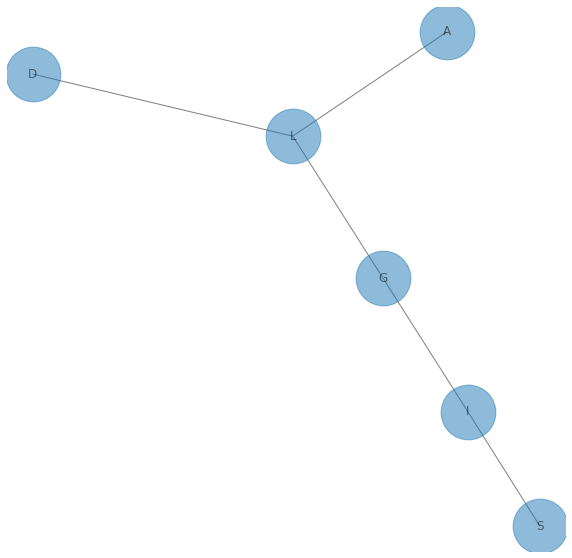

In [5]:
def plot_graph_from_edges(edges):
    fig, ax = plt.subplots(figsize=(10,10))
    G = nx.Graph()
    G.add_edges_from(edges.edges)
    nx.draw(G, with_labels=True, alpha=0.5, node_size=3000, ax=ax) 
    
plot_graph_from_edges(bic_model)    

The structure discovered is a simple linear graph. This result is not exactly what might be expected. This structure can be tested by computing the BIC score.


In [6]:
print(BicScore(samples_1000).score(bic_model))

-756.9726916084524


In [7]:
bic_model.local_independencies(['D', 'I', 'S', 'G', 'L', 'A'])

(D ⟂ G, S, A, I | L)
(G ⟂ S | I)
(L ⟂ S, I | G)
(A ⟂ G, S, D, I | L)

Notice that the BIC score has increased considerably from the graph structure used to simulate the dataset. 

As has been mentioned, a considerable amount of data can be required to find the structure of graphical models. Let's see if this makes a difference. The code in the cell below creates a new dateset with 25,000 simulated cases.

In [8]:
## Simulation to create a larger data set
nsamps = 25000
nr.seed(22234)
samples_25000 = simulate_from_DAG(student_model, nsamps = nsamps)
samples_25000

Generating for node: A: 100%|████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 64.00it/s]


,D,G,I,L,S,A
0,1,0,0,0,0,0
1,1,0,1,0,1,0
2,1,1,1,0,1,0
3,1,1,1,0,1,1
4,0,2,1,1,1,1
...,...,...,...,...,...,...
24995,0,0,1,0,1,1
24996,1,2,1,1,1,0
24997,1,2,1,1,1,1
24998,0,0,1,0,1,0


With the data simulated, execute the code in the cell below to define and fit the model. 

In [9]:
est_bic_big = HillClimbSearch(samples_25000)
bic_model_big = est_bic_big.estimate(scoring_method=BicScore(samples_25000))
list(bic_model_big.edges)

  0%|                                                                           | 7/1000000 [00:00<19:04:37, 14.56it/s]


[('D', 'I'),
 ('G', 'L'),
 ('G', 'I'),
 ('G', 'D'),
 ('I', 'S'),
 ('L', 'A'),
 ('S', 'A')]

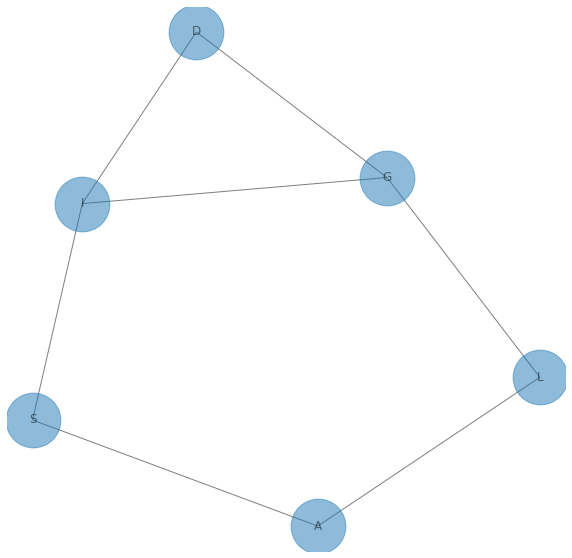

In [10]:
plot_graph_from_edges(bic_model_big) 

You can see that a more complex tree has been computed as a model. The relationships are quite different from the ones used for the simulation. 

Now, we can compare the change in BIC from the initial model to the model discovered with the BIC objective function. 

In [11]:
print(BicScore(samples_25000).score(student_model))
print(BicScore(samples_25000).score(bic_model_big))

-77022.8283276875
-77027.6892988135


The BIC has changed slightly between the two models, with a small improvement for the 'discovered' model. 

Finally, let's have a look at the independencies for this graph. 

In [12]:
bic_model_big.local_independencies(['D', 'I', 'S', 'G', 'L', 'A'])

(D ⟂ L | G)
(I ⟂ L | G, D)
(S ⟂ G, D, L | I)
(L ⟂ D, S, I | G)
(A ⟂ G, I, D | L, S)

While these independencies are different from the model used to simulate the data, they are not unreasonable. In particular, the independencies of Acceptance, the Letter and the Score are all the same as the generative model. 

## The K2 Score method

Another approach to model scoring is the **K2 algorithm** or **K2 score method**. The K2 algorithm uses a greedy search, such as hill climbing, and proceeds by the following steps:   
1. The nodes are ordered. The search will follow this ordering.   
2. The search begins begins with the first node in the order, which initially has no parents.   
3. Parents are added incrementally in the order that the action increases the score the most.  
4. The search terminates when the score no longer increases. 

A number of scoring metrics have been used with the K2 algorithm. The most commonly used is the **Bayesian score**. For a graph, $\mathcal{G}$, and $n$ dimensional data $D$ sampled from the joint distribution we can apply Bayes' theorem:

$$p(D\ |\ \mathcal{G}) = \frac{p(\mathcal{G}\ |\ D) p(\mathcal{G})}{p(D)} = \frac{p(\mathcal{G}, D)}{p(D)}$$

The prior distribution, is typically a uniform Dirichlet, unless we have some reason to bias the solution toward a particular structure. 

Since $p(D)$ is the same for all graph structures we can use either the marginal likelihood, $p(\mathcal{G}\ |\ D)$, or the joint posterior probability distribution.

We can assume the parameters associated with each variable in the graph are independent, the K2 metric can be decomposed:

$$p(\mathcal{G}, D) = p(\mathcal{G}) \prod_{i=1}^n g(d_i, \mathbf{P_{a_i}})\\ 
where\\
g(d_i, \mathbf{P_{a_i}}) = subscore\ of\ ith\ dimension$$

This decomposition allows the search algorithm to find the maximum score variable by variable. 

The requirement to select a good search order of the nodes can lead to difficulties applying the K2 algorithm in practice. A number of random starts can be used to used to try different node orderings. 

An advantage of the K2 method is that no restrictions need be applied to the number of parents of a node. The constraints for the search arise from the initial node ordering. 

A more complete discussion of the K2 algorithm can be found in the [paper by Lerner and Malka](http://www.ee.bgu.ac.il/~boaz/LernerMalkaAAI2011.pdf).

## Another Computational Example

Let's apply the K2 algorithm to the student model example. 

As a first step, we can compute the K2 score for the model used for the simulation. 

In [13]:
print(K2Score(samples_1000).score(student_model))

-749.8571312130016


Next, we compute the graph structure using the dataset and the K2 score.

In [14]:
nr.seed(1234)
est_K2S = HillClimbSearch(samples_1000)
K2S_model = est_K2S.estimate(scoring_method=K2Score(samples_1000))
list(K2S_model.edges)

  0%|                                                                           | 6/1000000 [00:00<11:50:33, 23.46it/s]


[('G', 'I'), ('G', 'D'), ('I', 'S'), ('L', 'G'), ('L', 'A'), ('S', 'A')]

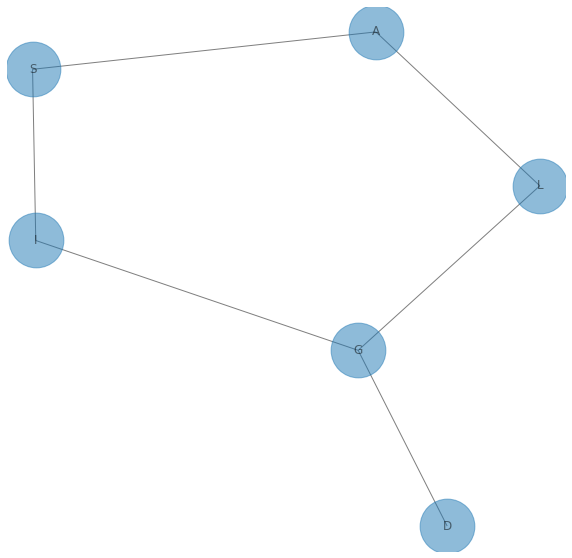

In [15]:
plot_graph_from_edges(K2S_model) 

This result is different than the ones we obtained using the BIC score. In either case, the result is clearly different from the model used for the simulation. Notice that the dependencies of Acceptance are still the Letter and the Score. Other dependencies are reversed, which in not unreasonable given the data.  

Next we can compute the K2 score for the resulting model. 

In [16]:
print(K2Score(samples_1000).score(K2S_model))

-751.1339120812534


The K2 score is a bit lower for this new model when compared to the generative model.

Let's see if using a larger dataset has any effect. The code in the cell below computes a graph using 25,000 cases rather than 250. 

In [17]:
est_K2S_big = HillClimbSearch(samples_25000)
K2S_model_big = est_K2S_big.estimate(scoring_method=K2Score(samples_25000))
list(K2S_model_big.edges)

  0%|                                                                           | 7/1000000 [00:00<17:50:56, 15.56it/s]


[('G', 'I'),
 ('G', 'D'),
 ('I', 'S'),
 ('I', 'D'),
 ('L', 'G'),
 ('L', 'A'),
 ('S', 'A')]

The resulting graph structure is the same as the one obtained by using fewer cases. 

But how does the K2 score change? 

In [18]:
print(K2Score(samples_25000).score(student_model))
print(K2Score(samples_25000).score(K2S_model_big))

-77010.86550485104
-77015.28817178472


Again, the K2 score is a bit lower for this new model when compared to the generative model. Notice that you cannot compare scores using different data sets.     

What are the independencies in this DAG? 

In [19]:
K2S_model_big.local_independencies(['D', 'I', 'S', 'G', 'L','A'])

(D ⟂ L, S, A | G, I)
(I ⟂ L | G)
(S ⟂ G, D, L | I)
(A ⟂ G, I, D | L, S)

These independencies are noticeably different from those obtained using the BIC score and from the generative model. However, they are not unreasonable. Acceptance has the expected independencies as does Score. As already noted some other independecies occur in a reversed order. Apparently the data alone are not sufficient to separate these cases when using a greedy algorithm.  

Finally, we can compare the model obtained with BIC scoring to the model using K2 scoring. We can use both K2 and BIC score for this comparison. 

In [20]:
def print_BIC_score(models, names, samples=samples_25000):
    '''
    Function to print BIC score for comparing DAG models
    ags: list of models, samples used for evaluation 
    returns: Nothing
    '''
    for mod, name in zip(models, names):
        BIC_score = BicScore(samples).score(mod)
        K2_score = K2Score(samples).score(mod)
        print('For model ' + str(name) + ' BIC = {:.2f},  K2 Score = {:.2f}'.format(BIC_score, K2_score))
    

models = [bic_model_big, K2S_model_big]
model_names = ['bic_model_big', 'K2S_model_big']
print_BIC_score(models, model_names)

For model bic_model_big BIC = -77027.69,  K2 Score = -77015.84
For model K2S_model_big BIC = -77027.69,  K2 Score = -77015.29


Not surprisingly, these scores are the same, since the models are the same. 

## Overview of Information Theory

In order to find an optimal structure for a Bayesian directed graphical model we need to have a loss **loss function**, also known as a **cost function**. In simple terms, the loss function measures how well the graphical model represents the available data. The lower the loss, the better the fit. 

### Shannon Entropy

As a first step in understanding information theory we need to define **Shannon entropy**:

$$\mathbb{H}(I) = E[I(X)] = E[-ln_b(P(X))] = - \sum_{i=1}^n P(x_i) ln_b(P(x_i)$$  
Where:  
$E[X] = $ the expectation of $X$.  
$I(X) = $ the information content of $X$.   
$P(X) = $ probability of $X$.  
$b = $ base of the logarithm.    

This rather abstract formula gives us a way to compute the expected information content of a vector of observations $X$. The more likely (higher probability) $X$ is the less informative it is. In other words, unexpected observations carry the most information.  


### Kullback-Leibler Divergence

To create a loss function from the definition of Shannon entropy we start with the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. The KL divergence is an information theoretic measure of the difference between two distributions, $P(X)$ and $Q(X)$.

$$\mathbb{D}_{KL}(P|Q) = - \sum_{i=1}^n p(x_i)\ ln_b \frac{p(x_i)}{q(x_i)}$$

Ideally, in the case of training a machine learning model we want a distribution $Q(X)$, which is identical to the actual data distribution $P(X)$. In this case the KL divergence is 0 since:

$$ln (\frac{p(x_i)}{q(x_i)}) = ln(1) = 0$$

But, you may say, if we could know $P(X)$ why compute $Q(X)$ at all? Fortunately, we do not have to. We can rewrite the KL divergence as:

$$\mathbb{D}_{KL}(P|Q) = \sum_{i=1}^n p(x_i)\ ln_b \big(p(x_i) \big) - \sum_{i=1}^n p(x_i)\ ln_b \big( q(x_i) \big)$$

Here, $ln_b$ is the log base 2 logarithm. Using base 2 gives KL divergence units of bits. 

Since $P(X)$ is fixed and we wish to find $Q(X)$ when we train our model, we can minimize the term on the right, which is the **cross entropy** defined as:

$$\mathbb{H}(P,Q) = - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

From the formulation of KL divergence above you can see the following.

$$\mathbb{D}_{KL}(P|Q) = \mathbb{H}(P) + \mathbb{H}(P,Q)\\
\mathbb{D}_{KL}(P|Q) = Entropy(P) + Cross\ Entropy(P,Q)$$

Thus, we can minimize divergence by minimizing cross entropy. This idea is both intuitive and computationally attractive. The closer the estimated distribution $q(X)$ is to the distribution of the true underling process $p(X)$, the lower the cross entropy and the lower the KL divergence. 

In general we will not know $p(X)$. In fact, if we did, why would we need to solve a training problem? So, we can use the following approximation.

$$\mathbb{H}(P,Q) = - \frac{1}{N} \sum_{i=1}^n ln_b q(x_i)$$



### Mutual Information

There is one other information theoretic concept we must address, **mutual information**. Conceptually, mutual information between two variables measures how much knowing the value of one variable tells us about the other. Quantitatively, we can express mutual information as follows:

$$I(X;Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) log \Big( \frac{p(x,y)}{p(x) p(y)} \Big)$$ 

We can gain some intuition by considering the value of $I(X;Y)$ when the two distributions are independently distributed. In this case:

$$log \Big( \frac{p(x,y)}{p(x) p(y)} \Big) = log(1) = 0$$

In words, when $p(x)$ and $p(y)$ are independent there is no mutual information. 

Mutual information has several important properties. The first property is that mutual information must be greater than or equal to zero; $I(X;Y) \ge 0$. Second, mutual information is symmetric: $I(X;Y) = I(Y;X)$. We can also relate mutual information to entropy, conditional entropy and joint entropy as follows:

$$I(X;Y) \equiv H(X) - H(X\ |\ Y) \equiv H(Y) - H(Y\ |\ X) \\
\equiv H(X) + H(Y) - H(X,Y)$$

Finally, the mutual information, $I(X;Y)$, is the Kullback-Leibler divergence between the product of $p(x)$ and $p(y)$ and the joint distribution $p(x,y)$: 

$$I(X;Y) = D_{KL}\big( p(x,y) \parallel p(x)\ p(y) \big)$$

Intuitively, the greater this divergence the more information available on one variable given the other. Likewise, if $p(x)$ and $p(y)$ are independent the KL divergence with respect to the joint distribution is 0. 

## The Chow-Liu Tree Algorithm

The Chow-Liu algorithm is an information theoretic approach to finding the structure of probabilistic models. The idea is to find a tree structure for the graph that best fits the distribution as measured by the KL divergence. The Chow-Liu tree algorithm has some practical advantages over many heuristic methods, since it is guaranteed to converge. 

The KL divergence for a DAG with a distribution, $q(x)$, representing an unknown distribution, $p(x)$, with $D$ variables,becomes:

$$KL(p  \parallel q) = \mathbb{E}_{p(x)} \big( log(p(x)) \big) - \sum_{i=1}^D \mathbb{E}_{p(x_i,x_{pa(i)})}  \big(   
log(q(x_i\ |\ x_{pa(i)}) \big)$$  
where, $\mathbb{E}$ indicates the expectation over the distribution. 

The for any two variables in the distribution, $x_i$ and $x_j$  mutual information is:

$$MI(x_i, x_j) = \mathbb{E}_{p(x)} \bigg( log \Big( \frac{p(x_i,p_j)}{p(x_i)\ p(x_j)} \Big) \bigg)$$

After some considerable algebra (see Section in Barber 9.5.4 and many other sources for details) we can now write the KL divergence of the tree as:

$$KL(p  \parallel q) = -\sum_{i=1}^D MI(x_i;x_{pa(i)})- \mathbb{E}_{p(x_i)}
\big( log(p(x_i)) \big) + Constant$$

The second term depends only on $p(x)$ and the third term is a constant. Thus minimizing $KL(p  \parallel q)$ is the same as maximizing $\sum_{i=1}^D MI(x_i;x_{pa(i)})$.  

Maximizing the mutual information seems like a straight forward approach to finding graphical model structure. However, this problem is under-constrained. For finite sized datasets, the mutual information between any pair of variables in unlikely to be $0$. 

### A Computational Example

We can test the Chow-Liu algorithm on our student admissions model data. This model is not especially idea for this situation since it is specifically for trees. Whereas, the generative model is clearly not a tree, since the graph has cycles. 

The code in the cell below applies the Chow-Liu algorithm to the sampled data. The Chow-Liu algorithm requires that we specify a **root node** as a starting point to grow the tree. In this case we will pick Intelligence. However this choice is a bit arbitrary, since there are two independent variables, Intelligence and Difficulty. Now, execute the code and and examine the list of edges.   

In [21]:
nr.seed(1333)
est_ChowLiu = TreeSearch(samples_1000, root_node='I')
ChowLiu_model = est_ChowLiu.estimate(estimator_type='chow-liu')
list(ChowLiu_model.edges)

Building tree: 100%|███████████████████████████████████████████████████████████████| 15/15.0 [00:00<00:00, 1002.59it/s]


[('I', 'S'), ('I', 'G'), ('G', 'L'), ('G', 'D'), ('L', 'A')]

Examine the edges. It will be easier to interpret this graph by drawing it. Execute the code in the cell below to display the drawing. 

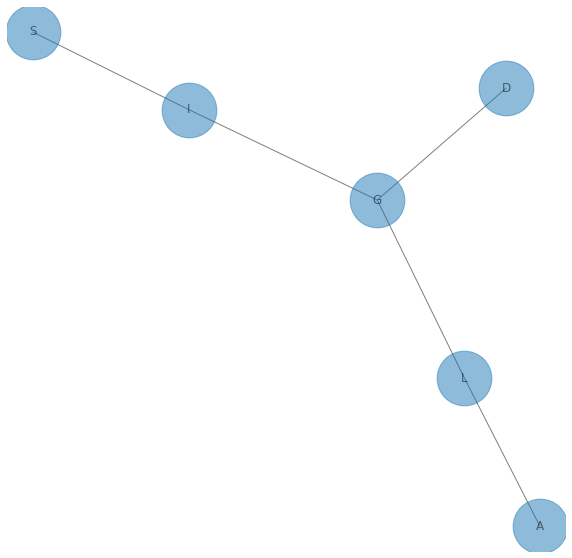

In [22]:
plot_graph_from_edges(ChowLiu_model) 

Given the limitation of a tree, the result is not unexpected. One point to notice is that the Difficulty is a dependent variable, as was the case with the hill climb search models.    

You can further understand the relationship in the tree by examining the local independencies. Execute the code in the cell below to display these independencies.   

In [23]:
ChowLiu_model.local_independencies(['D', 'I', 'S', 'G', 'L','A'])

(D ⟂ L, S, A, I | G)
(S ⟂ G, D, A, L | I)
(G ⟂ S | I)
(L ⟂ D, S, I | G)
(A ⟂ G, S, D, I | L)

These independencies are reasonable given the tree structure. Acceptance is dependent on the Letter, since no node can be dependent on more than one variable in a tree.      

#### Copyright 2018, 2019, 2021, Stephen F Elston. All rights reserved. 